In [31]:
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [32]:
f = r'C:\Users\lu.jin01\OneDrive - Cardinal Health\2.Jpt_code\Geron2\datasets\titanic'

In [33]:
# set pandas display options to show full table
def set_pandas_display_options() -> None:
    display = pd.options.display

    display.max_columns = 1000
    display.max_rows = 1000
    display.max_colwidth = 199
    display.width = None
    # display.precision = 2  # set as needed

set_pandas_display_options()

In [34]:
try:
    train = pd.read_csv(os.path.join(f,'train.csv'), index_col='PassengerId')
    test = pd.read_csv(os.path.join(f,'test.csv'), index_col='PassengerId')
except:
    train = pd.read_csv(os.path.join('data','train.csv'), index_col='PassengerId')
    test = pd.read_csv(os.path.join('data','test.csv'), index_col='PassengerId')
print(train.shape,test.shape)

explore = train.copy()

(891, 11) (418, 10)


The attributes have the following meaning:
* **Survived**: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
* **Pclass**: passenger class.
* **Name**, **Sex**, **Age**: self-explanatory
* **SibSp**: how many siblings & spouses of the passenger aboard the Titanic.
* **Parch**: how many children & parents of the passenger aboard the Titanic.
* **Ticket**: ticket id
* **Fare**: price paid (in pounds)
* **Cabin**: passenger's cabin number
* **Embarked**: C = Cherbourg, Q = Queenstown, S = Southampton

## 1. Data Exploration

In [35]:
explore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Cols having missing values: *Age, cabin, and Embarked***

<br>

In [36]:
# check if classes are evenly distributed
explore.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [37]:
# investigate age missing rows
train[(train.Age.isna()) & (train.Pclass==3)].head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C
46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S


**Conclusion: no evidence of missing age due to child-fare**

<br>

In [38]:
explore.pivot_table('Name',columns='Sex',index='Survived',aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [39]:
explore.pivot_table('Name',columns='Embarked',index='Survived',aggfunc='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [40]:
# explore.Ticket.value_counts()

In [41]:
# explore.Ticket.astype(str)

In [42]:
# explore[explore.Ticket.str.len()<7].sort_values(by='Ticket')

In [43]:
explore.Fare = explore.Fare.round(-1)
explore.pivot_table('Name',columns='Fare',index='Survived',aggfunc='count')

Fare,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,110.0,120.0,130.0,140.0,150.0,160.0,210.0,220.0,230.0,250.0,260.0,510.0
Survived,,,,,,,,,,,,,,,,,,,,,,
0,16.0,327.0,54.0,76.0,16.0,17.0,6.0,14.0,8.0,1.0,4.0,NaN,NaN,1.0,3.0,NaN,1.0,1.0,1.0,1.0,2.0,NaN
1,1.0,113.0,46.0,59.0,12.0,13.0,19.0,5.0,23.0,12.0,7.0,4.0,4.0,2.0,6.0,2.0,3.0,NaN,3.0,1.0,4.0,3.0


In [44]:
explore.pivot_table('Age',index='Survived',aggfunc='mean')

,Age
Survived,
0,30.626179
1,28.343690


In [45]:
explore.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.00000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,33.01908
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.25032
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,10.00000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,10.00000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,30.00000
max,1.000000,3.000000,80.000000,8.000000,6.000000,510.00000


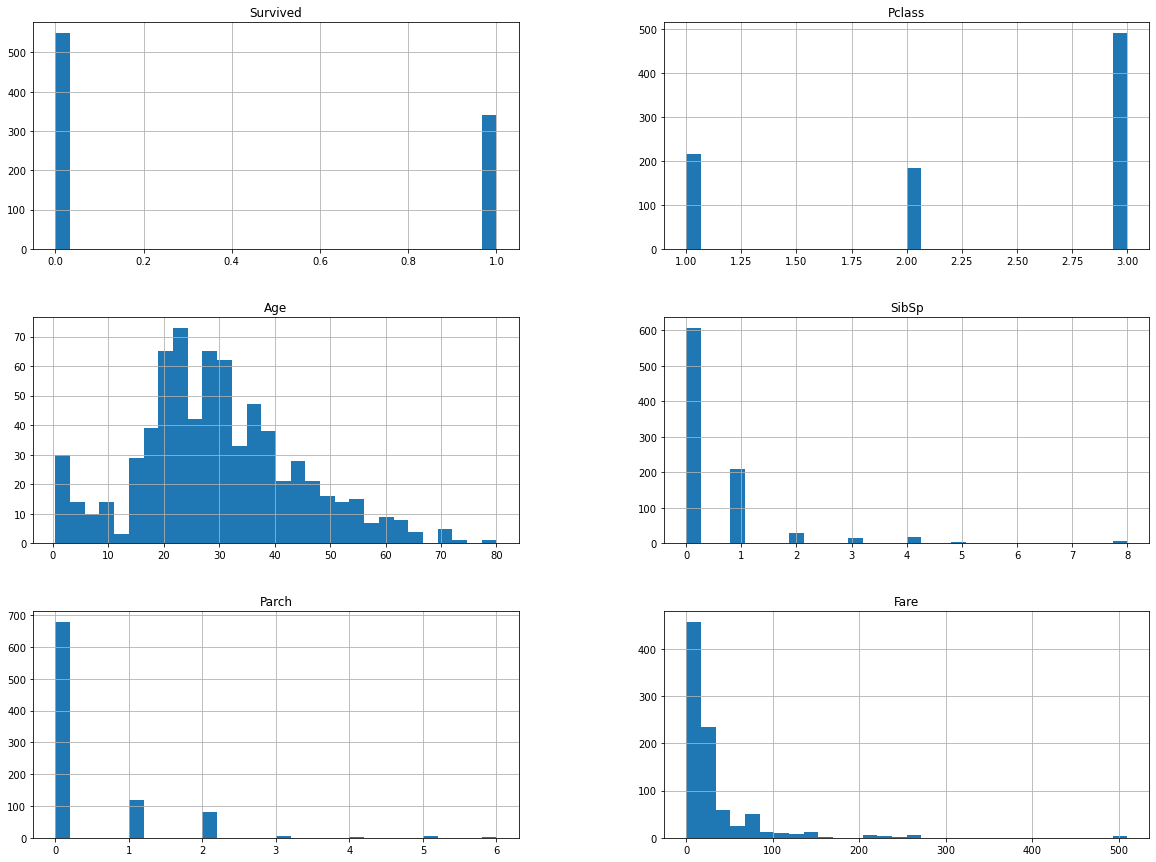

In [46]:
explore.hist(bins=30,figsize=(20,15))
plt.show()

## 2. Feature Engineering 

>**1. process name**

In [47]:
# examine names
noble = ['Duke.','Duchess.','Marquess.','Marchioness.','Lord.','Lady.','Earl.','Countess.','Honourable.',
    'Viscount','Viscountess','Baron','Baroness','Knight.']
Ms = ['Mrs.', 'Miss.']

explore['Noble'] = explore['Name'].str.contains('|'.join(noble))

In [48]:
explore.pivot_table('Name',columns='Noble',index='Survived',aggfunc='count')

Noble,False,True
Survived,,
0,548,1
1,340,2


**Noble not worth it**

> **2. Mean encoding**

> 2.1 Cross Validation Regularizatoin

In [49]:
explore.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Noble         0
dtype: int64

**only `Embarked` is fit for mean encoding**

In [50]:
explore['Embarked_me']=explore.groupby('Embarked')['Survived'].transform('mean')
explore['Embarked_me'].fillna(explore['Survived'].mean(), inplace=True)

explore['Cabin1'] = explore.Cabin.str[0]
explore['Cabin1_me']=explore.groupby('Cabin1')['Survived'].transform('mean')
explore['Cabin1_me'].fillna(explore['Survived'].mean(), inplace=True)

explore['Sex_me']=explore.groupby('Sex')['Survived'].transform('mean')
explore.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Noble,Embarked_me,Cabin1,Cabin1_me,Sex_me
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,10.0,NaN,S,False,0.336957,NaN,0.383838,0.188908
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,70.0,C85,C,False,0.553571,C,0.593220,0.742038
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,10.0,NaN,S,False,0.336957,NaN,0.383838,0.742038
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,50.0,C123,S,False,0.336957,C,0.593220,0.742038
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,10.0,NaN,S,False,0.336957,NaN,0.383838,0.188908


In [51]:
print('CORR: ', np.corrcoef(explore['Survived'].values, explore['Embarked_me'].values)[0][1].round(2))
explore['Embarked_me'].unique()

CORR:  0.17


array([0.33695652, 0.55357143, 0.38961039, 0.38383838])

In [52]:
print('CORR:', np.corrcoef(explore['Survived'].values, explore['Cabin1_me'].values)[0][1].round(2))
explore['Cabin1_me'].unique()

CORR: 0.33


array([0.38383838, 0.59322034, 0.75      , 0.5       , 0.75757576,
       0.46666667, 0.74468085, 0.61538462, 0.        ])

In [53]:
print('CORR:', np.corrcoef(explore['Survived'].values, explore['Sex_me'].values)[0][1].round(2))
explore['Sex_me'].unique()

CORR: 0.54


array([0.18890815, 0.74203822])

> **2.2 Regularize using KFold**

In [54]:
explore.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Noble,Embarked_me,Cabin1,Cabin1_me,Sex_me
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,10.0,NaN,S,False,0.336957,NaN,0.383838,0.188908
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,70.0,C85,C,False,0.553571,C,0.593220,0.742038
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,10.0,NaN,S,False,0.336957,NaN,0.383838,0.742038
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,50.0,C123,S,False,0.336957,C,0.593220,0.742038
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,10.0,NaN,S,False,0.336957,NaN,0.383838,0.188908


In [59]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=12, shuffle=True)

me_feats = ['Embarked','Cabin1','Sex']

for col in me_feats:
    explore[col+'_me_cv'] = 0
    for train_index, val_index in kf.split(explore): # use cross-val index to reduce encoding results' correlation with target
        train, val = explore.iloc[train_index], explore.iloc[val_index]
        mean = val[col].map(train.groupby(col)['Survived'].mean())
        explore.iloc[val_index, explore.columns.get_loc(col+'_me_cv')] = mean
        explore[col+'_me_cv'].fillna(explore['Survived'].mean(), inplace=True)

In [60]:
explore.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Noble,Embarked_me,Cabin1,Cabin1_me,Sex_me,Embarked_me_cv,Cabin1_me_cv,Sex_me_cv
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,10.0,NaN,S,False,0.336957,NaN,0.383838,0.188908,0.361702,0.383838,0.187638
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,70.0,C85,C,False,0.553571,C,0.593220,0.742038,0.526718,0.555556,0.761538
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,10.0,NaN,S,False,0.336957,NaN,0.383838,0.742038,0.321569,0.383838,0.722892
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,50.0,C123,S,False,0.336957,C,0.593220,0.742038,0.322394,0.585366,0.743802
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,10.0,NaN,S,False,0.336957,NaN,0.383838,0.188908,0.338462,0.383838,0.192560


In [63]:
print('CORR: ', np.corrcoef(explore['Survived'].values, explore['Embarked_me_cv'].values)[0][1].round(2))
explore['Embarked_me_cv'].unique()

CORR:  0.13


array([0.36170213, 0.52671756, 0.32156863, 0.32239382, 0.33846154,
       0.45762712, 0.34050881, 0.40625   , 0.54545455, 0.39344262,
       0.56934307, 0.33333333, 0.53787879, 0.58571429, 0.38383838,
       0.36065574])

In [64]:
print('CORR:', np.corrcoef(explore['Survived'].values, explore['Cabin1_me_cv'].values)[0][1].round(2))
explore['Cabin1_me_cv'].unique()

CORR: 0.3


array([0.38383838, 0.55555556, 0.58536585, 0.80769231, 0.5       ,
       0.77777778, 0.42857143, 0.73684211, 0.7027027 , 0.60869565,
       0.78378378, 0.66666667, 0.76      , 0.46153846, 0.7826087 ,
       0.62      , 0.74358974, 0.6       , 0.54545455, 0.75675676,
       0.70833333, 0.72413793, 0.75      , 0.73333333, 0.33333333,
       0.58333333, 0.78571429])

In [65]:
print('CORR:', np.corrcoef(explore['Survived'].values, explore['Sex_me_cv'].values)[0][1].round(2))
explore['Sex_me_cv'].unique()

CORR: 0.54


array([0.18763797, 0.76153846, 0.72289157, 0.74380165, 0.19256018,
       0.74297189, 0.19396552, 0.73828125, 0.17659574])

*conlusion: CV helps reduce on correlation slightly, but more so for weak-correlated features than strong one*

> **2.3 Regularize using Expanding mean**

In [66]:
for feature in me_feats:
    cum_sum = explore.groupby(feature)['Survived'].cumsum() - explore['Survived']
    cum_count = explore.groupby(feature).cumcount()

    explore[feature + '_me_expmean'] = cum_sum / cum_count
    explore[feature + '_me_expmean'].fillna(explore['Survived'].mean(), inplace=True)

In [67]:
for feat in me_feats:
    # fill the first value with median
    explore[feat+'_me_expmean'].replace([np.inf,-np.inf], explore[feat+'_me_expmean'].median(), inplace=True)
    # calculate the correlation
    print('CORR of ', feat, ' with target is: ', np.corrcoef(explore['Survived'].values, explore[feat+'_me_expmean'].values)[0][1].round(2))

CORR of  Embarked  with target is:  0.06
CORR of  Cabin1  with target is:  0.01
CORR of  Sex  with target is:  0.54


*conlusion: Expanding Mean is more effective than CV on correlation reduction*

> ##### mean Encode for testing

In [68]:
# Create mean encoding for testing set using CV
from sklearn import base

class KFoldTargetEncoderTest(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self,train,orig_cols,enc_cols):
        
        self.train = train
        self.orig_cols = orig_cols
        self.enc_cols = enc_cols
        
    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        assert(isinstance(self.orig_cols,list))
        assert(isinstance(self.enc_cols,list))
        enc_cols_lis = []
        for orig_col, enc_col in zip(self.orig_cols, self.enc_cols):
            mean =  self.train.groupby(orig_col)[enc_col].mean()
            X[enc_col] = X[orig_col].map(mean)
        enc_cols_lis.append(X)
        return pd.concat(enc_cols_lis,axis=1)

In [69]:
explore.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Noble,Embarked_me,Cabin1,Cabin1_me,Sex_me,Embarked_me_cv,Cabin1_me_cv,Sex_me_cv,Embarked_me_expmean,Cabin1_me_expmean,Sex_me_expmean
PassengerId,,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,10.0,NaN,S,False,0.336957,NaN,0.383838,0.188908,0.361702,0.383838,0.187638,0.383838,3.838384e-01,0.383838
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,70.0,C85,C,False,0.553571,C,0.593220,0.742038,0.526718,0.555556,0.761538,0.383838,3.838384e-01,0.383838
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,10.0,NaN,S,False,0.336957,NaN,0.383838,0.742038,0.321569,0.383838,0.722892,0.000000,4.607182e+18,1.000000
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,50.0,C123,S,False,0.336957,C,0.593220,0.742038,0.322394,0.585366,0.743802,0.500000,1.000000e+00,1.000000
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,10.0,NaN,S,False,0.336957,NaN,0.383838,0.188908,0.338462,0.383838,0.192560,0.666667,2.306969e+18,0.000000


In [70]:
test_me_feats = [feat + '_me_cv' for feat in me_feats]

test_enc_model = KFoldTargetEncoderTest(explore,me_feats,test_me_feats)
test['Cabin1'] = test.Cabin.str[0]
test_enc_feats = test_enc_model.fit_transform(test)

> **3. KNN encoding**

In [71]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import NearestNeighbors # Unsupervised learner for implementing neighbor searches

class NearestNeighborsFeats(BaseEstimator, ClassifierMixin):
    '''
        This class should implement KNN features extraction 
    '''
    def __init__(self, n_jobs, k_list, metric, n_classes=None, n_neighbors=None, eps=1e-6):
        self.n_jobs = n_jobs
        self.k_list = k_list # list of K_neighbors candidates, e.g.: [2,3,4,5,...]
        self.metric = metric
        
        if n_neighbors is None:
            self.n_neighbors = max(k_list) 
        else:
            self.n_neighbors = n_neighbors
            
        self.eps = eps        
        self.n_classes_ = n_classes
    
    def fit(self, X, y):
        '''
            Set up the train set and self.NN object
        '''
        # Create a NearestNeighbors (NN) object. We will use it in `predict` function 
        self.NN = NearestNeighbors(n_neighbors=max(self.k_list), 
                                      metric=self.metric, 
                                      n_jobs=1, 
                                      algorithm='brute' if self.metric=='cosine' else 'auto')
        self.NN.fit(X)
        
        # Store labels 
        self.y_train = y
        
        # Save how many target classes we have
        self.n_classes = np.unique(y).shape[0] if self.n_classes_ is None else self.n_classes_
        
        
    def predict(self, X):       
        '''
            Produces KNN features for every instance of X
        '''
        test_feats = []
        
        if self.n_jobs == 1:
            for i in range(X.shape[0]):
                test_feats.append(self.get_features_for_one(X[i:i+1]))
                
        else:
            from multiprocessing import Pool
            import os
            if __name__ == '__main__':
                with Pool(processes=self.n_jobs) as pool:
                    # evaluate "f(X)" asynchronously
                    res = pool.apply_async(self.get_features_for_one, X.shape[0])      # runs in *only* one process
                    print(res.get(timeout=1))             # prints "400"

                    # evaluate "os.getpid()" asynchronously
                    res = pool.apply_async(os.getpid, ()) # runs in *only* one process
                    print(res.get(timeout=1))             # prints the PID of that process

                    # launching multiple evaluations asynchronously *may* use more processes
                    multiple_results = [pool.apply_async(os.getpid, ()) for i in range(self.n_jobs)]
                    print([res.get(timeout=1) for res in multiple_results])

                    # make a single worker sleep for 10 secs
                    res = pool.apply_async(time.sleep, (10,))
                    try:
                        print(res.get(timeout=1))
                        results = [pool.apply(self.get_features_for_one, args=(X[i:i+1],)) for i in range(X.shape[0])]
                        test_feats.append(results)
                    except TimeoutError:
                        print("We lacked patience and got a multiprocessing.TimeoutError")
                    
            
        return np.vstack(test_feats)
        
        
    def get_features_for_one(self, x):
        '''
            Computes KNN features for a single object `x`
        '''

        NN_output = self.NN.kneighbors(x)
        
        # Vector of size `n_neighbors`
        # Stores indices of the neighbors
        neighs = NN_output[1][0]
        
        # Vector of size `n_neighbors`
        # Stores distances to corresponding neighbors
        neighs_dist = NN_output[0][0] 

        # Vector of size `n_neighbors`
        # Stores labels of corresponding neighbors
        
#         import pdb; pdb.set_trace()
        neighs_y = np.array(self.y_train)[neighs]
            
        
        ## ========================================== ##
        ##              YOUR CODE BELOW
        ## ========================================== ##
        
        # We will accumulate the computed features here
        # Eventually it will be a list of lists or np.arrays
        # and we will use np.hstack to concatenate those
        return_list = [] 
        
        
        ''' 
            1. Fraction of objects of every class.
               It is basically a KNNСlassifiers predictions.

               Take a look at `np.bincount` function, it can be very helpful
               Note that the values should sum up to one
        '''
        for k in self.k_list:
            # YOUR CODE GOES HERE
            labels = np.bincount(neighs_y[:k], minlength=self.n_classes)
            feats = labels/labels.sum()
            
            assert len(feats) == self.n_classes
            return_list += [feats]
        
        
        '''
            2. Same label streak: the largest number N, 
               such that N nearest neighbors have the same label.
               
               What can help you: `np.where`
        '''
        
        feats =  np.where(np.unique(neighs_y).size==1, neighs_y.size, np.argmin(np.array(neighs_y[:-1]==neighs_y[1:])) + 1)
 
        
#         assert len(feats) == 1
        assert feats.size == 1
        return_list += [feats]
        
        '''
            3. Minimum distance to objects of each class
               Find the first instance of a class and take its distance as features.
               
               If there are no neighboring objects of some classes, 
               Then set distance to that class to be 999.

               `np.where` might be helpful
        '''
        feats = []
        for c in range(self.n_classes):
            # YOUR CODE GOES HERE
            dis_array = neighs_dist[np.where(neighs_y==c)]
            dis = 999 if dis_array.size==0 else dis_array[0]
            feats.append(dis)
        
        assert len(feats) == self.n_classes
        return_list += [feats]
        
        '''
            4. Minimum *normalized* distance to objects of each class
               As 3. but we normalize (divide) the distances
               by the distance to the closest neighbor.
               
               If there are no neighboring objects of some classes, 
               Then set distance to that class to be 999.
               
               Do not forget to add self.eps to denominator.
        '''
        feats = []
        for c in range(self.n_classes):
            # YOUR CODE GOES HERE
            dis_array = neighs_dist[np.where(neighs_y==c)]
            dis = 999 if dis_array.size==0 else dis_array[0] / (neighs_dist[0] + self.eps)
            feats.append(dis)
    
        assert len(feats) == self.n_classes
        return_list += [feats]
        
        '''
            5. 
               5.1 Distance to Kth neighbor
                   Think of this as of quantiles of a distribution
               5.2 Distance to Kth neighbor normalized by 
                   distance to the first neighbor
               
               feat_51, feat_52 are answers to 5.1. and 5.2.
               should be scalars
               
               Do not forget to add self.eps to denominator.
        '''
        for k in self.k_list:
            
            feat_51 = neighs_dist[k-1] # YOUR CODE GOES HERE
            feat_52 = neighs_dist[k-1] / (neighs_dist[0] + self.eps) # YOUR CODE GOES HERE
            
            return_list += [[feat_51, feat_52]]
        
        '''
            6. Mean distance to neighbors of each class for each K from `k_list` 
                   For each class select the neighbors of that class among K nearest neighbors 
                   and compute the average distance to those objects
                   
                   If there are no objects of a certain class among K neighbors, set mean distance to 999
                   
               You can use `np.bincount` with appropriate weights
               Don't forget, that if you divide by something, 
               You need to add `self.eps` to denominator.
        '''
        for k in self.k_list:
            
            # YOUR CODE GOES IN HERE
            mean_dist = np.bincount(neighs_y[:k], weights=neighs_dist[:k], minlength=self.n_classes) \
                    / (np.bincount(neighs_y[:k], minlength=self.n_classes) + self.eps)
            feats = np.where(mean_dist==0, 999, mean_dist)
            
            assert len(feats) == self.n_classes
            return_list += [feats]
        
        
        # merge
        knn_feats = np.hstack(return_list)

        return knn_feats

In [80]:
X, y = explore.drop('Survived',axis=1), explore['Survived']
knn_cols = ['SibSp','Parch','Fare']
X_nnf = X[knn_cols]

In [73]:
X_nnf.isna().any()

SibSp    False
Parch    False
Fare     False
dtype: bool

In [74]:
# Create instance of our KNN feature extractor
NNF = NearestNeighborsFeats(n_jobs=1, k_list=[3,4,5], metric='minkowski')

# Fit on train set
NNF.fit(X_nnf, y)

# Get features for test
knn_feats = NNF.predict(X_nnf)

> get the KNN features for test

In [83]:
X_test_nnf = test[knn_cols]
X_test_nnf.isna().any()

SibSp    False
Parch    False
Fare      True
dtype: bool

In [84]:
X_test_nnf = X_test_nnf.fillna({'Fare':explore.Fare.mean()})
X_test_nnf.isna().any()

SibSp    False
Parch    False
Fare     False
dtype: bool

In [85]:
test_knn_feats = NNF.predict(X_test_nnf)

In [86]:
test_knn_feats.shape

(418, 23)

> 3. select features for training

In [87]:
explore.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Noble,Embarked_me,Cabin1,Cabin1_me,Sex_me,Embarked_me_cv,Cabin1_me_cv,Sex_me_cv,Embarked_me_expmean,Cabin1_me_expmean,Sex_me_expmean
PassengerId,,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,10.0,NaN,S,False,0.336957,NaN,0.383838,0.188908,0.361702,0.383838,0.187638,0.383838,0.383838,0.383838


In [89]:
X_cols_keep = ['Pclass','Age','SibSp','Parch','Fare','Embarked_me_cv','Cabin1_me_cv','Sex_me_cv']
X,y = explore[X_cols_keep], explore['Survived']

X_MeanEnc_KnnFeats = np.c_[X.values,knn_feats]
X.shape, X_MeanEnc_KnnFeats.shape

((891, 8), (891, 31))

> 4. get the same encoding features for testing

In [93]:
X_test = test[X_cols_keep]
X_test_MeanEnc_KnnFeats = np.c_[X_test.values, test_knn_feats]
X_test.shape, X_test_MeanEnc_KnnFeats.shape

((418, 8), (418, 31))

## 3. Training with GB Tree

In [94]:
import xgboost
xgb_clf = xgboost.XGBClassifier()

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_MeanEnc_KnnFeats, y, test_size=0.2, random_state=15)
xgb_clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=4)

from sklearn.metrics import accuracy_score
accuracy_score(xgb_clf.predict(X_val), y_val).round(4)

[0]	validation_0-error:0.189944
Will train until validation_0-error hasn't improved in 4 rounds.
[1]	validation_0-error:0.178771
[2]	validation_0-error:0.156425
[3]	validation_0-error:0.178771
[4]	validation_0-error:0.156425
[5]	validation_0-error:0.156425
[6]	validation_0-error:0.156425
Stopping. Best iteration:
[2]	validation_0-error:0.156425



0.8436

In [95]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
xgb_params = {
            'max_depth': [3,4,5],
            'learning_rate':stats.reciprocal(0.005, 0.5),
            'n_estimators':stats.randint(20, 230),
            'gamma':[0, 0.5 ,1]
         }

random_tree = RandomizedSearchCV(xgb_clf, n_jobs=-1, param_distributions=xgb_params, n_iter=300, cv=3)

random_tree.fit(X_MeanEnc_KnnFeats, y)
print(random_tree.best_score_.round(4))
random_tree.best_params_

0.8552


{'gamma': 1,
 'learning_rate': 0.27283334300390366,
 'max_depth': 5,
 'n_estimators': 109}

In [96]:
random_tree.best_estimator_.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=4)
accuracy_score(random_tree.best_estimator_.predict(X_val), y_val).round(4)

[0]	validation_0-error:0.156425
Will train until validation_0-error hasn't improved in 4 rounds.
[1]	validation_0-error:0.156425
[2]	validation_0-error:0.145251
[3]	validation_0-error:0.156425
[4]	validation_0-error:0.134078
[5]	validation_0-error:0.134078
[6]	validation_0-error:0.139665
[7]	validation_0-error:0.139665
[8]	validation_0-error:0.139665
Stopping. Best iteration:
[4]	validation_0-error:0.134078



0.8659

# apply model on test set

In [103]:
y_test_hat = random_tree.best_estimator_.predict(X_test_MeanEnc_KnnFeats)

In [117]:
y_test_output = pd.Series(y_test_hat, index=test.index, name = 'Survived')
pd.DataFrame(y_test_output).to_csv('Titanic_3_feat_gen_pred.csv')